In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv("weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
data["Height"] = data["Height"] * 2.54
data["Weight"] = data["Weight"] / 2.205
data = data.replace(["Male", "Female"], [1,0])
data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
...,...,...,...
9995,0,168.078536,62.030591
9996,0,170.350573,77.491114
9997,0,162.224700,58.265451
9998,0,175.346978,74.309506


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <BarContainer object of 10 artists>)

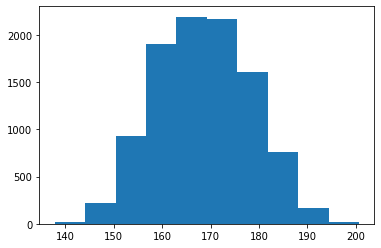

In [4]:
plt.hist(data["Height"])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <BarContainer object of 10 artists>)

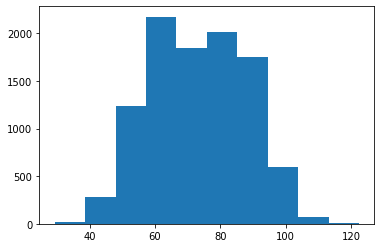

In [5]:
plt.hist(data["Weight"])

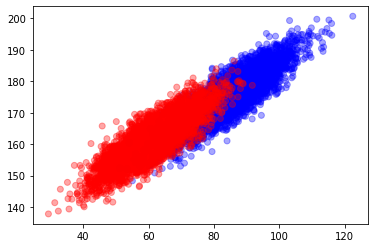

In [6]:
colors = ["red", "blue"]
plt.scatter(data["Weight"], data["Height"], c = data["Gender"], cmap = ListedColormap(colors), alpha = 0.35)

In [7]:
X_train = np.array([data["Weight"], data["Height"]]).T
Y_train = np.array(data["Gender"])



In [8]:
class KNN:
    def __init__(self, k):
        self.k = k

    # train
    def Fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def Calculate_distance(self, a, b):
        dis = np.sqrt(np.sum((a - b) ** 2))
        return dis

    def NearNeighbors(self, X_test):
        dists = []
        for x_train in self.X_train:
           dists.append(self.Calculate_distance(self.X_train, X_test))
        
        index_sorted = np.argsort(dists)
        gender_sorted = self.Y_train[index_sorted]
        return gender_sorted[0:self.k]

    def Evaluate(self, X_test, Y_test):
        predicts = []
        for test in X_test:
            predicts.append(self.Predict(test))
        correct_gueses = []
        for i in range(len(X_test)):
            if predicts[i] == Y_test[i]:
                correct_gueses.append(1)
            else:
                correct_gueses.append(0)
        correct_gueses = np.sum(correct_gueses)
        return correct_gueses * 100 / len(Y_test)


    def Predict(self, X_test):
        near_neighbors = self.NearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(near_neighbors))
        return Y_test

In [9]:
knn = KNN(k=11)
knn.Fit(X_train, Y_train)

X_test = np.array([100, 185]) #me
answer = knn.Predict(X_test)
answer

0

In [10]:
x_test = X_train[4950:5050]
y_test = Y_train[4950:5050]

In [11]:
correct_percentage = str(knn.Evaluate(x_test, y_test))
correct_percentage += '%'
correct_percentage

'50.0%'

In [12]:
org_knn = KNeighborsClassifier(n_neighbors=13)
org_knn.fit(X_train, Y_train)
gender_predict = org_knn.predict(x_test)

metrics.accuracy_score(gender_predict,y_test)

0.95